**Heuristique d'Insertion**

L'heuristique d'insertion est un algorithme qui permet d'insérer une ville dans un réseau en veillant à ce que celui ne soit pas désavnatgé par la ville.
Sur le code ci-dessous, on génère des villes, calcule la distance entre deux points et on affiche le chemin.
J'ai ajouté des commandes qui permettent de calculer la distance totale ainsi que le temps de calcul pour chaque exemple de villes (j'ai fait 3 essais différents : 20, 50 et 100 villes).

**Implémentation**

In [35]:
import random
import math
from time import perf_counter
import matplotlib.pyplot as plt

# Générer villes
# On génére des villes aléatoirement
def gen_villes(n, largeur = 100, hauteur = 100, seed = 42):
    random.seed(seed)
    return [(random.uniform(0, largeur), random.uniform(0, hauteur)) for _ in range(n)]

# Calcul distances
# On calcule la distance entre deux points
def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
# On construit une matrice de distances entre toutes les villes
def constr_matrice_distances(villes):
    n = len(villes)
    matrice = [[0.0] * n for _ in range(n)] # Matrice carré initialisée à 0
    for i in range(n):
        for j in range(i + 1, n):
            d = distance(villes[i], villes[j])
            matrice[i][j] = d
            matrice[j][i] = d
    return matrice


# Affichage du chemin

def afficher_chemin(villes, chemin):
    x = [villes[i][0] for i in chemin]
    y = [villes[i][1] for i in chemin]

    plt.figure(figsize=(10, 8))
    plt.plot(x, y, 'o-')
    for i, idx in enumerate(chemin):
        plt.text(villes[idx][0], villes[idx][1], str(idx), fontsize=9, ha='right')
    plt.title("Heuristique d'Insertion")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.show()



L'algorithme de l'heuristique d'insertion est le suivant :

In [36]:
# Heuristique d'Insertion

def heuristique_insert(villes, matrice_distances):
    
    n = len(villes)
    non_visitees = list(range(n))
    
    chemin_init = non_visitees[:3] # On commence par 3 villes
    non_visitees = non_visitees[3:]
    chemin_init.append(chemin_init[0])  # fermer le cycle (retour à celle de départ)
# tant qu'il reste des villes non visitées
    while non_visitees:
        meilleur_cout = float('inf') # coût d'insert minimal
        meilleure_ville = None
        meilleure_position = None
# Ici on recherche la meilleure ville à insérer entre deux villes
        for ville in non_visitees:
            for i in range(1, len(chemin_init)):
                a = chemin_init[i - 1]
                b = chemin_init[i]
                cout = (
                    matrice_distances[a][ville] +
                    matrice_distances[ville][b] -
                    matrice_distances[a][b]
                )
                if cout < meilleur_cout:
                    meilleur_cout = cout
                    meilleure_ville = ville
                    meilleure_position = i
# On l'insère au meilleur endroit
        chemin_init.insert(meilleure_position, meilleure_ville)
        non_visitees.remove(meilleure_ville)
# On calcule la distance totale
    distance_totale = 0.0
    for i in range(len(chemin_init) - 1):
        distance_totale += matrice_distances[chemin_init[i]][chemin_init[i + 1]]

    return chemin_init, distance_totale

**Exemples**

L'exemple suivant permet de calculer l'heuristique d'insertion avec 20 villes.

Distance totale : 352.32


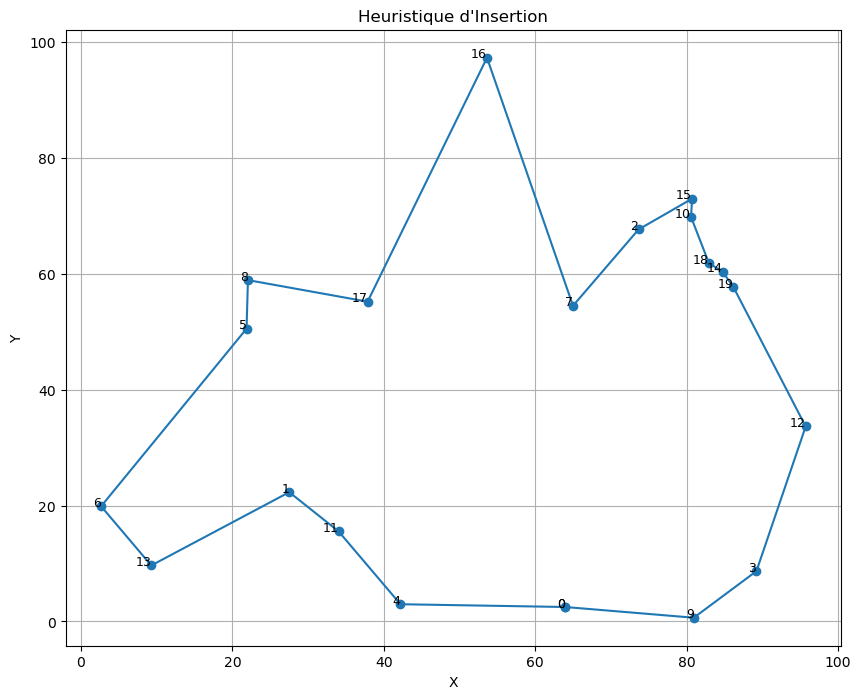

In [37]:
villes = gen_villes(20) # On généère 20 villes aléatoires
matrice = constr_matrice_distances(villes) # On construit la matrice des distances
start_insert = perf_counter()
chemin_init, distance_totale = heuristique_insert(villes, matrice) # On calcul le chemin avec heuristique
end_insert = perf_counter()
temps_insert = end_insert - start_insert
print("Distance totale :", round(distance_totale, 2))
afficher_chemin(villes, chemin_init) # On affiche le graphe du chemin

Le morceau de code suivant permet de calculer l'heuristique d'insertion avec 50 villes.

Distance totale trouvée : 648.05
- Temps de calcul : 0.002351 secondes


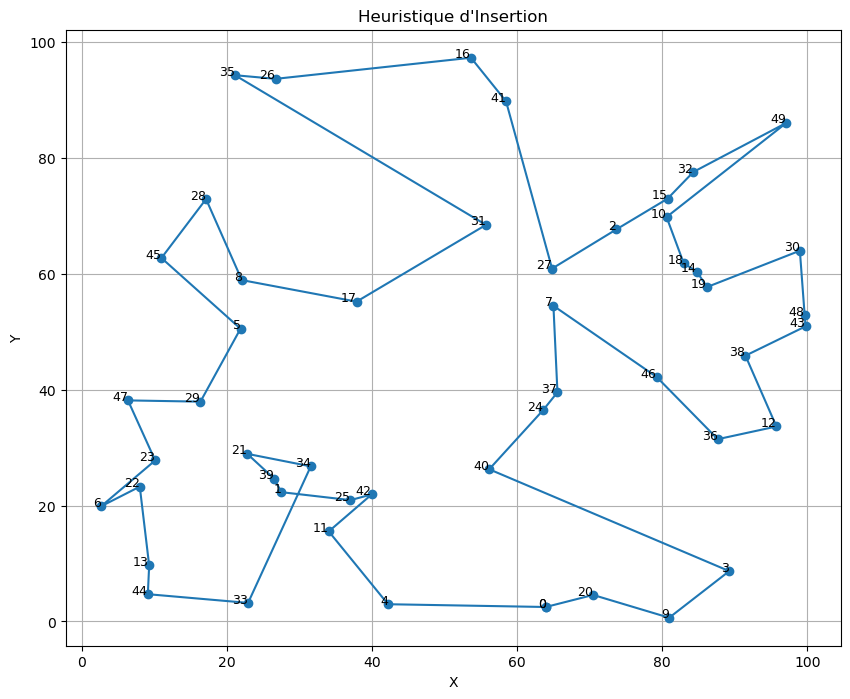

In [38]:
villes = gen_villes(50)
matrice = constr_matrice_distances(villes)
start_insert = perf_counter()
chemin_init, distance_totale = heuristique_insert(villes, matrice)
end_insert = perf_counter()
temps_insert = end_insert - start_insert

print("Distance totale trouvée :", round(distance_totale, 2))
print("- Temps de calcul :", round(temps_insert, 6), "secondes")
afficher_chemin(villes, chemin_init)


Le morceau de code suivant permet de calculer l'heuristique d'insertion pour 100 villes.

Distance totale : 930.16
- Temps de calcul : 0.018605 secondes


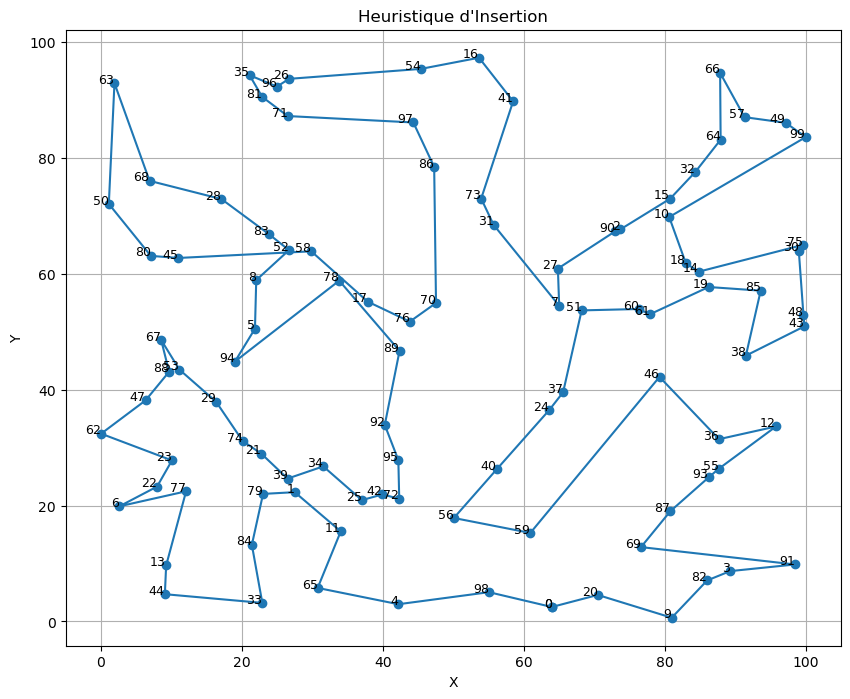

In [39]:
villes = gen_villes(100)
matrice = constr_matrice_distances(villes)
start_insert = perf_counter()
chemin_init, distance_totale = heuristique_insert(villes, matrice)
end_insert = perf_counter()
temps_insert = end_insert - start_insert

print("Distance totale :", round(distance_totale, 2))
print("- Temps de calcul :", round(temps_insert, 6), "secondes")
afficher_chemin(villes, chemin_init)

**Recuit Simulé**

Le recuit simulé consiste à utiliser, ici, l'heuristique d'insertion et à l'améliorer en utilisant des solutions temporaires qui ne sont pas optimales pour éviter les minima-locaux.

**Implémentation**

In [40]:
import random
import math
import matplotlib.pyplot as plt

# Longueur d’un chemin
# Calcul la somme des distances entre chaque ville
def longueur_chemin(chemin, matrice_distances):
    return sum(
        matrice_distances[chemin[i]][chemin[i + 1]]
        for i in range(len(chemin) - 1)
    )


# Génération d’un voisin

def gen_voisin(chemin):
    a, b = sorted(random.sample(range(1, len(chemin) - 1), 2))
    voisin = chemin[:a] + chemin[a:b][::-1] + chemin[b:]
    return voisin

# Affichage du chemin

def afficher_chemin(villes, chemin):
    x = [villes[i][0] for i in chemin]
    y = [villes[i][1] for i in chemin]

    plt.figure(figsize=(10, 8))
    plt.plot(x, y, 'o-')
    for i, idx in enumerate(chemin):
        plt.text(villes[idx][0], villes[idx][1], str(idx), fontsize=9, ha='right')
    plt.title("Recuit Simulé")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.axis("equal")
    plt.show()



Le code ci-dessous permet de générer le recuit simulé, à partir de l'heuristique d'insertion. 
J'ai ajouté des commandes qui permettent de calculer la distance pour les 3 exemples (20, 50 et 100 villes) après le recuit simulé et le temps de calcul. Le programme permet de savoir si la distance a été amélioré ou non par le recuit.

L'algorithme du recuit simulé est le suivant :

In [41]:
# Recuit simulé

def recuit_simule(matrice_distances, chemin_initial, temperature_initiale=15000, alpha=0.9995, iterations_max=50000): # Chemin initial = heuristique de départ, temp. initiale = contrôle la proba. d'accepter des mauvaises solutions, alpha = diminue la temp.
    courant = chemin_initial[:] # On copie le chemin actuel
    meilleur = courant[:] # Meilleure solution 
    distance_courante = longueur_chemin(courant, matrice_distances)
    meilleure_distance = distance_courante
    temperature = temperature_initiale

    for _ in range(iterations_max):
        voisin = gen_voisin(courant) # Génère une solution voisine
        distance_voisin = longueur_chemin(voisin, matrice_distances)
        delta = distance_voisin - distance_courante

        if delta < 0 or random.random() < math.exp(-delta / temperature): # Si la solution est meilleure, on l'accepte sinon, on peut l'accepter selon la température
            courant = voisin
            distance_courante = distance_voisin
            if distance_voisin < meilleure_distance:
                meilleur = voisin
                meilleure_distance = distance_voisin

        temperature *= alpha # On réduit la température
        if temperature < 1e-3:
            break # On arrête si la température est trop basse

    return meilleur, meilleure_distance

**Exemples**

Le code ci-dessus permet de simuler l'exemple de recuit simulé avec 20 villes.

Distance après recuit simulé : 352.32
Temps de calcul : 0.177924 secondes
Le recuit n’a pas amélioré la distance.


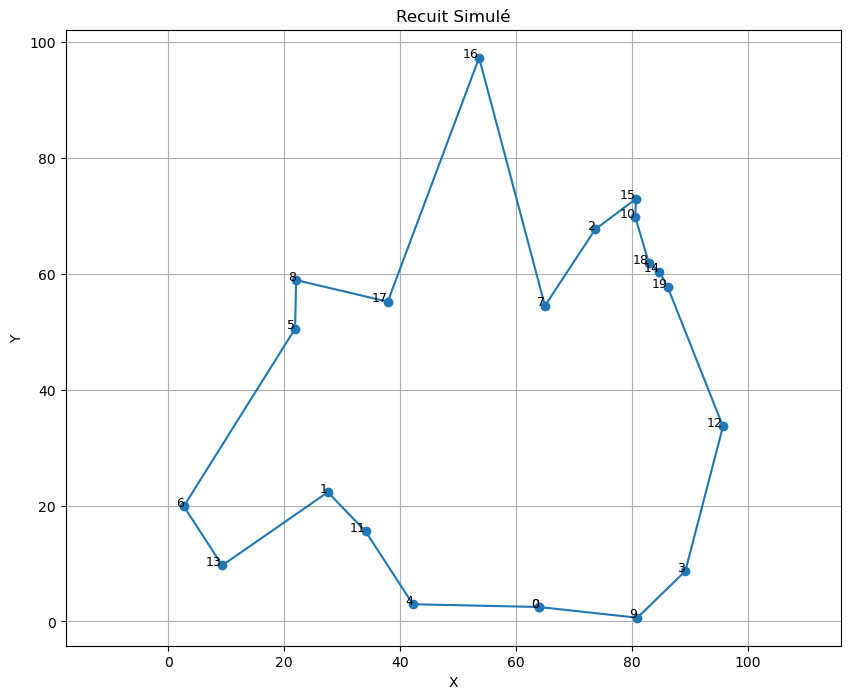

In [42]:
villes = gen_villes(20)
matrice = constr_matrice_distances(villes)
chemin_init, _ = heuristique_insert(villes, matrice)

start_rs = perf_counter()
chemin_rs, distance_rs = recuit_simule(matrice, chemin_init)
end_rs = perf_counter()
time_rs = end_rs - start_rs
print("Distance après recuit simulé :", round(distance_rs, 2))
print("Temps de calcul :", round(time_rs, 6), "secondes")
distance_init = longueur_chemin(chemin_init, matrice)
if round(distance_rs, 2) >= round(distance_init, 2):
    print("Le recuit n’a pas amélioré la distance.")
else:
    print("Le recuit a amélioré la distance.")

afficher_chemin(villes, chemin_rs)

Le code ci-dessus permet de simuler l'exemple de recuit simulé avec 50 villes.

Distance après recuit simulé : 604.07
Temps de calcul : 0.258487 secondes
Le recuit a amélioré la distance.


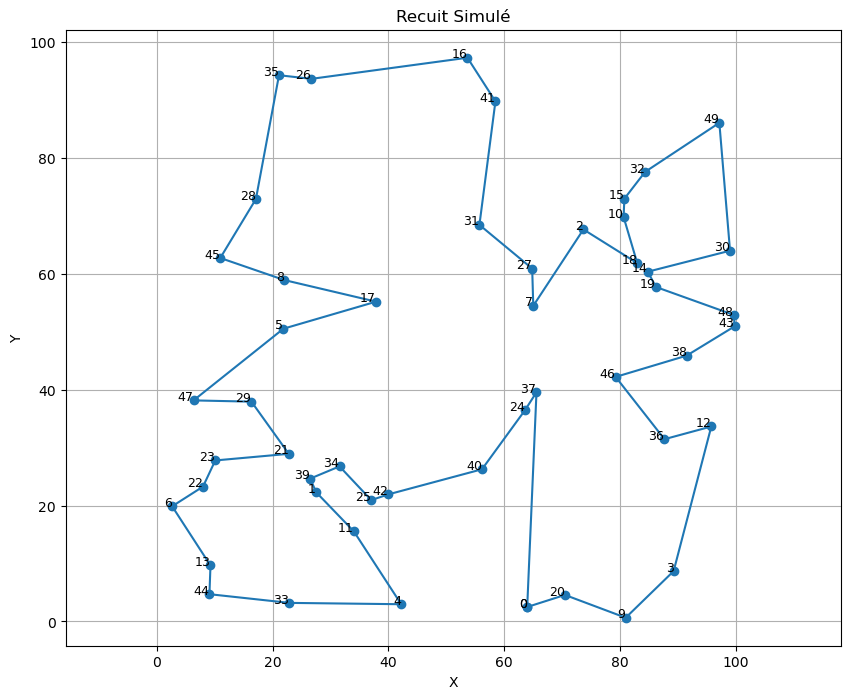

In [43]:
villes = gen_villes(50)
matrice = constr_matrice_distances(villes)
chemin_init, _ = heuristique_insert(villes, matrice)

start_rs = perf_counter()
chemin_rs, distance_rs = recuit_simule(matrice, chemin_init)
end_rs = perf_counter()
time_rs = end_rs - start_rs


print("Distance après recuit simulé :", round(distance_rs, 2))
print("Temps de calcul :", round(time_rs, 6), "secondes")

distance_init = longueur_chemin(chemin_init, matrice)
if round(distance_rs, 2) >= round(distance_init, 2):
    print("Le recuit n’a pas amélioré la distance.")
else:
    print("Le recuit a amélioré la distance.")

afficher_chemin(villes, chemin_rs)


Le code ci-dessus permet de simuler l'exemple de recuit simulé avec 100 villes.

Distance après recuit simulé : 892.84
Temps de calcul : 0.39944 secondes
Le recuit a amélioré la distance.


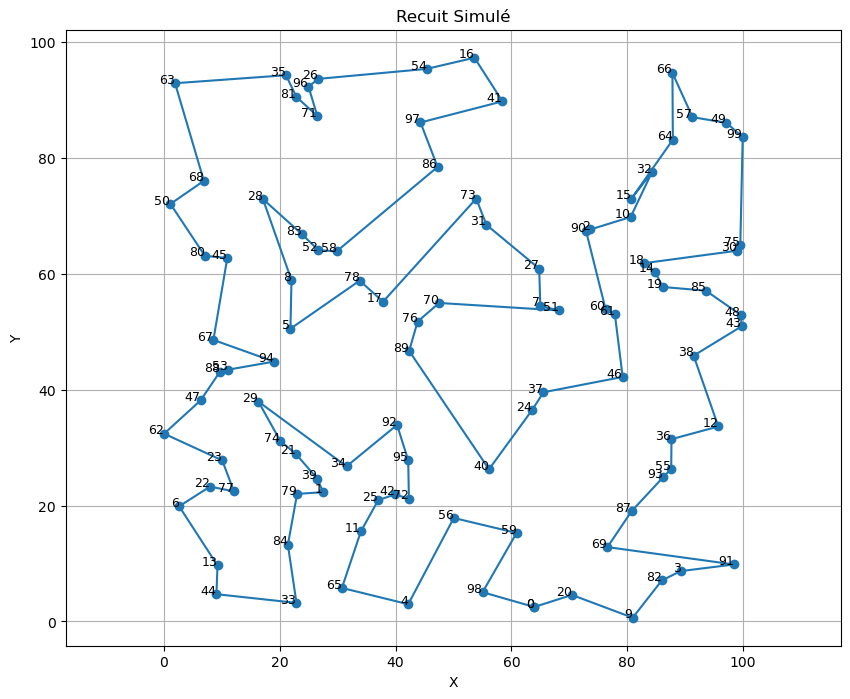

In [44]:
villes = gen_villes(100)
matrice = constr_matrice_distances(villes)
chemin_init, _ = heuristique_insert(villes, matrice)

start_rs = perf_counter()
chemin_rs, distance_rs = recuit_simule(matrice, chemin_init)
end_rs = perf_counter()
temps_rs = end_rs - start_rs

print("Distance après recuit simulé :", round(distance_rs, 2))
print("Temps de calcul :", round(temps_rs, 6), "secondes")

distance_init = longueur_chemin(chemin_init, matrice)
if round(distance_rs, 2) >= round(distance_init, 2):
    print("Le recuit n’a pas amélioré la distance.")
else:
    print("Le recuit a amélioré la distance.")


afficher_chemin(villes, chemin_rs)
